<a href="https://colab.research.google.com/github/vishnu123sai/Fashion-Collection-Prediction/blob/master/fashion_mnist_collection_prediction_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
tf.__version__
keras.__version__

'2.2.4-tf'

In [0]:
# dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_f, y_train_f),(X_test, y_test)  = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
X_train_f.shape

(60000, 28, 28)

In [0]:
#spliting into test and valid dataset

X_valid, X_train = X_train_f[:5000] / 255.0 , X_train_f[5000:]/255.0;
print(X_valid.shape ,X_train.shape)
y_valid, y_train = y_train_f[:5000], y_train_f[5000:];
print(y_train.shape, y_valid.shape)

(5000, 28, 28) (55000, 28, 28)
(55000,) (5000,)


In [0]:
#label defining
class_names = ["T_Shirt/Top","Trouser","PullOver","Dress","Coat","Sandal","Shirt","Snekers","Bag","Ankle Boot"];
class_names[y_valid[100]]

'Bag'

In [0]:
# Creating model using sequential API

model = keras.models.Sequential()
print(type(model))
model.add(keras.layers.Flatten(input_shape = [28,28]));
#Flatten function just makes the input array to 1D
# If the input is X then it only preprocess the input by doing X.reshape(-1,1) operation
# we can also use keras.layers.InputLayer(input_sahape) alternative for Flattern
model.add(keras.layers.Dense(300, activation="relu"));
# Dense is a hideen layer we can pass no_of_nuerons and activation fun as parametres to this function
#it maintains its own weight matrix
#activation = "relu" is equal to keras.activartions.Relu
model.add(keras.layers.Dense(100, activation="relu"));
model.add(keras.layers.Dense(10, activation="softmax"));

# we have another way to create the model like 
# model = keras.models.Sequential()[
#   model.add(keras.layers.Flatten(input_shape = [28,28])),
#   model.add(keras.layers.Dense(300, activation="relu")),
#   model.add(keras.layers.Dense(100, activation="relu")),
#   model.add(keras.layers.Dense(10, activation="softmax"))
# ];

W0811 10:51:07.827376 140030594373504 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


<class 'tensorflow.python.keras.engine.sequential.Sequential'>


In [0]:
model.summary()  



# Model: "sequential_3"
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #   
# =================================================================
# flatten_2 (Flatten)          (None, 784)               0         
# _________________________________________________________________
# dense_6 (Dense)              (None, 300)               235500      (784*300)+ 300 (bias terms)
# _________________________________________________________________
# dense_7 (Dense)              (None, 100)               30100       (300*100) + 100(bias terms)
# _________________________________________________________________
# dense_8 (Dense)              (None, 10)                1010         (100 * 10) + 10 (bias terms)
# =================================================================
# Total params: 266,610
# Trainable params: 266,610
# Non-trainable params: 0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers
print(type(model.layers[1]))

<class 'tensorflow.python.keras.layers.core.Dense'>


In [0]:
# weights and bias terms 
w, b = model.layers[1].get_weights()
w.shape  
# weights are assigned randomly while intializing the values
b.shape
#bias values are assigned as zeros 


(300,)

In [0]:
# once the model is created we need to compile the model 
# while compiling the model we need pass some parameters like 
# 1. loss function or cost function (required)
# 2. optimizer (required)
# 3. metrics (optional)

model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer="sgd", metrics=['accuracy'])

In [0]:
history = model.fit(X_train,y_train, epochs=50, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 6s 102us/sample - loss: 0.7104 - acc: 0.7665 - val_loss: 0.5096 - val_acc: 0.8312
Epoch 2/50
55000/55000 [==============================] - 5s 95us/sample - loss: 0.4846 - acc: 0.8321 - val_loss: 0.4361 - val_acc: 0.8506
Epoch 3/50
55000/55000 [==============================] - 5s 97us/sample - loss: 0.4411 - acc: 0.8442 - val_loss: 0.4191 - val_acc: 0.8544
Epoch 4/50
55000/55000 [==============================] - 6s 103us/sample - loss: 0.4125 - acc: 0.8556 - val_loss: 0.4066 - val_acc: 0.8630
Epoch 5/50
55000/55000 [==============================] - 5s 98us/sample - loss: 0.3936 - acc: 0.8618 - val_loss: 0.3835 - val_acc: 0.8706
Epoch 6/50
55000/55000 [==============================] - 5s 98us/sample - loss: 0.3771 - acc: 0.8668 - val_loss: 0.3905 - val_acc: 0.8628
Epoch 7/50
55000/55000 [==============================] - 5s 95us/sample - loss: 0.3640 - acc: 0.8707 - val_loss: 0

In [0]:
history.history

{'acc': [0.76649094,
  0.8321273,
  0.8442,
  0.8556,
  0.8618,
  0.8668182,
  0.8707273,
  0.87430906,
  0.87845457,
  0.8806546,
  0.8844909,
  0.8868545,
  0.8889091,
  0.8911091,
  0.8935091,
  0.8957091,
  0.8984182,
  0.90001816,
  0.90090907,
  0.90427274,
  0.90532726,
  0.90607274,
  0.9073455,
  0.91014546,
  0.91063637,
  0.9140546,
  0.9139818,
  0.9152909,
  0.9173091,
  0.9175818,
  0.9202909,
  0.9207818,
  0.9232909,
  0.9237273,
  0.92434543,
  0.9252545,
  0.9277273,
  0.92874545,
  0.92898184,
  0.93,
  0.9310909,
  0.9323636,
  0.9335818,
  0.9342545,
  0.93618184,
  0.9363273,
  0.9383636,
  0.93854547,
  0.9401091,
  0.9416],
 'loss': [0.7103612293200059,
  0.48456431800018657,
  0.44110507387247955,
  0.41252170994932,
  0.39356281310211527,
  0.37705457664403047,
  0.3640092486208135,
  0.35269860292347993,
  0.34127194931290367,
  0.3327182404908267,
  0.32392919809168036,
  0.3160535481041128,
  0.30884774446920915,
  0.30239935878840357,
  0.29658477395231075

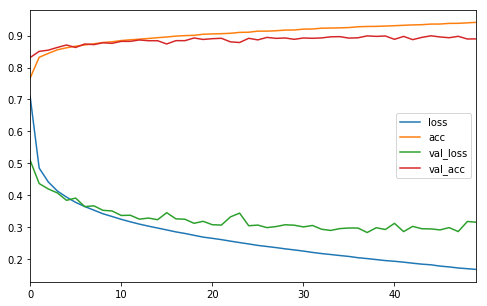

In [0]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))

In [0]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 47us/sample - loss: 74.5850 - acc: 0.8470


[74.58496237792968, 0.847]

In [0]:
X_n = X_test[:3]
y = model.predict(X_n)
y.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
X_n = X_test[10:30]
y_pred = model.predict_classes(X_n)
print(y_pred)
print(y_test[10:30])

[4 5 5 3 4 1 2 2 8 0 2 5 7 5 1 4 6 0 9 4]
[4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3]
